# Deep Learning Tutorial.
## Multi-Class Classification with Tensorflow and Keras Deep Learning Libraries
### 1. Construct a multi-layer neural network model.
### 2. Tune the hyper-parameters for training a model.
### 3. Evaluate a model.


# Iris Dataset
## https://archive.ics.uci.edu/ml/datasets/iris
# Fields description follow:
## 1. sepal length in cm
## 2. sepal width in cm
## 3. petal length in cm
## 4. petal width in cm
## 5. class:
## -- Iris Setosa
## -- Iris Versicolour
## -- Iris Virginica



# Install the following:
## pip install tensorflow==2.0.0




# Download the data and then convert it to pandas dataframe to analyze it.

In [1]:
# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [2]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

In [3]:
all_ds = pd.read_csv('iris_dataset.csv')

all_ds

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (150, 5)


In [5]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# Cleaning the data.

In [6]:
print("Display NA values in each columns: ")
all_ds.isna().sum(axis=0)

Display NA values in each columns: 


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [10]:
# Remove the rows with NA values.
all_ds = all_ds.dropna()

# You can also use the following line to fill the NA with Zeros.
# all_ds = all_ds.fillna(0)
# all_ds = all_ds.fillna(mean_of_column)



In [11]:
all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)


# Split the data into train/test splits.

In [12]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.2)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(120, 5)
(30, 5)


In [13]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(15, 5)
(15, 5)


In [14]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (120, 5)
 Test dataset       : (15, 5)
 Validation dataset : (15, 5)


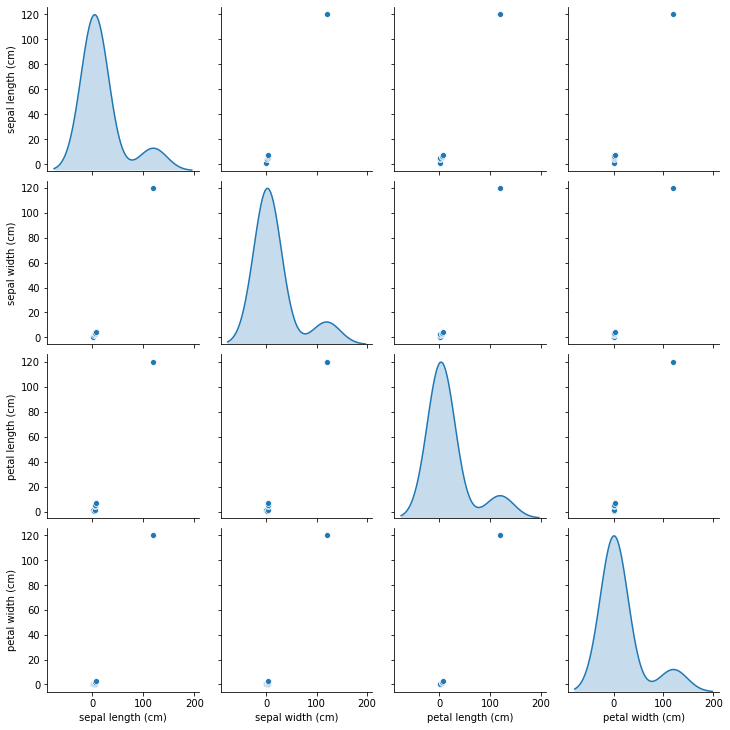

In [15]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("target")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'


In [16]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("target")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.840000,0.818628,4.4,5.1,5.75,6.4,7.7
sepal width (cm),120.0,3.065000,0.434761,2.2,2.8,3.00,3.4,4.4
petal length (cm),120.0,3.751667,1.788384,1.0,1.6,4.35,5.1,6.9
petal width (cm),120.0,1.195833,0.763714,0.1,0.3,1.30,1.8,2.5


In [17]:
train_labels1 = train_dataset.pop('target')
test_labels1 = test_dataset.pop('target')
valid_labels1 = valid_dataset.pop('target')

In [18]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

train_labels

,Label_0.0,Label_1.0,Label_2.0
137,0,0,1
105,0,0,1
138,0,0,1
19,1,0,0
119,0,0,1
...,...,...,...
29,1,0,0
38,1,0,0
77,0,1,0
75,0,1,0


# Data Normalization/Scaling
## Subtract the mean of the training data and divide by the standard deviation of the training data.

In [19]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)


In [20]:
# show a sample of the data after normalized
normed_train_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,0.684072,0.080504,0.977605,0.791090
105,2.149940,-0.149508,1.592686,1.183907
138,0.195449,-0.149508,0.586190,0.791090
19,-0.903952,1.690585,-1.259051,-1.172995
119,0.195449,-1.989601,0.698023,0.398273
136,0.561916,0.770539,1.033522,1.576724
36,-0.415329,1.000551,-1.370884,-1.303934
45,-1.270419,-0.149508,-1.314968,-1.172995
88,-0.293174,-0.149508,0.194775,0.136395
144,1.050539,0.540527,1.089438,1.707663


# Build a Neural Network Model 

# Training the model we built above.

In [21]:
%%time

# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(16, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated       
    model.add(Dense(3, activation='softmax'))                          # Output layer => output dimension = 1 since it is a regression problem
     # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',#from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model


EPOCHS = 100
batch_size = 16 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )



Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 0s 34ms/step - loss: 1.1114 - accuracy: 0.3661 - val_loss: 1.0118 - val_accuracy: 0.5333
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 1.1385 - accuracy: 0.3173 - val_loss: 1.0034 - val_accuracy: 0.5333
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 1.0946 - accuracy: 0.4231 - val_loss: 0.9953 - val_accuracy: 0.6000
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - los

In [22]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.602803,0.778846,0.566566,0.866667,95
96,0.602994,0.758929,0.564319,0.866667,96
97,0.624833,0.759615,0.562179,0.866667,97
98,0.623459,0.788462,0.560088,0.866667,98
99,0.589335,0.826923,0.558002,0.866667,99


In [23]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[0.37387893, 0.3857554 , 0.24036571],
       [0.78875726, 0.1062201 , 0.10502262],
       [0.83056563, 0.10094298, 0.06849141],
       [0.76499194, 0.13386214, 0.10114584],
       [0.06731856, 0.36824858, 0.56443286],
       [0.77827233, 0.14291924, 0.07880845],
       [0.22918591, 0.28221253, 0.48860162],
       [0.45031092, 0.3179064 , 0.23178262],
       [0.18537326, 0.31741264, 0.49721408],
       [0.74403584, 0.14756389, 0.10840034]], dtype=float32)

# See how the training went.


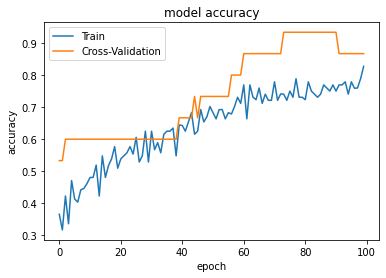

In [24]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

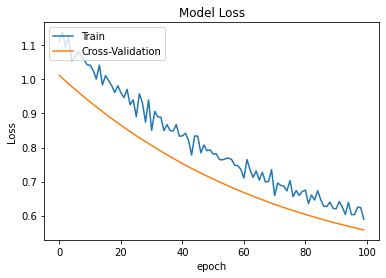

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [26]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))


Train Split: 
4/4 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.8000
Accuracy   :  0.80 


In [27]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 0.5580 - accuracy: 0.8667
Accuracy   :  0.87 


In [28]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))


Test Split: 
1/1 - 0s - loss: 0.6466 - accuracy: 0.8667
Accuracy   :  0.87


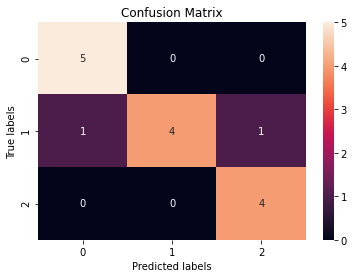

In [29]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

# predict_results = (predict_results.argmax())
predict_results= predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);
